In [ ]:
from sklearn import svm
#Basic imports
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

In [2]:
df=pd.read_csv("lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
len(df.columns)

16

In [4]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.shape

(309, 16)

In [8]:
df["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [9]:
pd.crosstab(df["LUNG_CANCER"],df["GENDER"])

GENDER,F,M
LUNG_CANCER,,
NO,22,17
YES,125,145


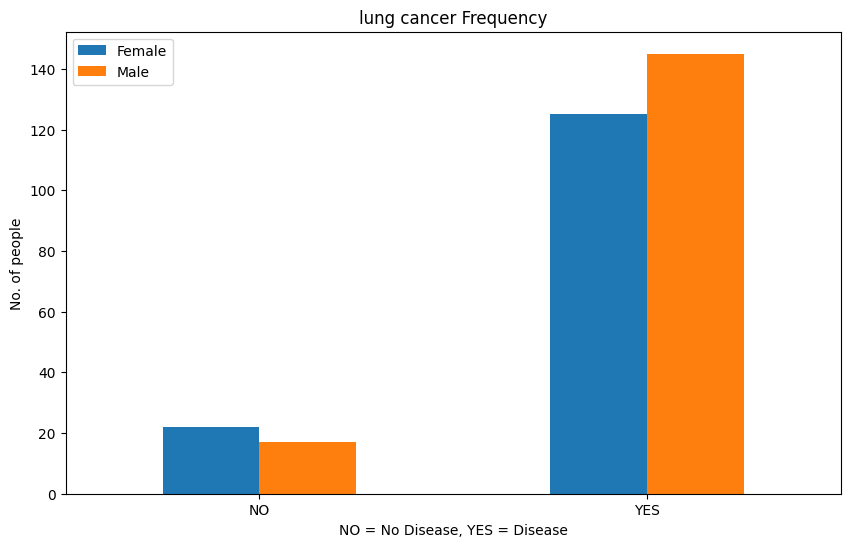

In [ ]:
pd.crosstab(df["LUNG_CANCER"],df["GENDER"]).plot(kind="bar",figsize=(10,6))
plt.title("lung cancer Frequency")
plt.xlabel("NO = No Disease, YES = Disease")
plt.ylabel("No. of people")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

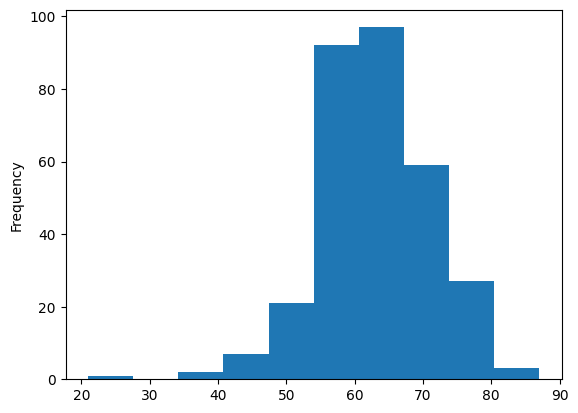

In [ ]:
df.AGE.plot.hist()

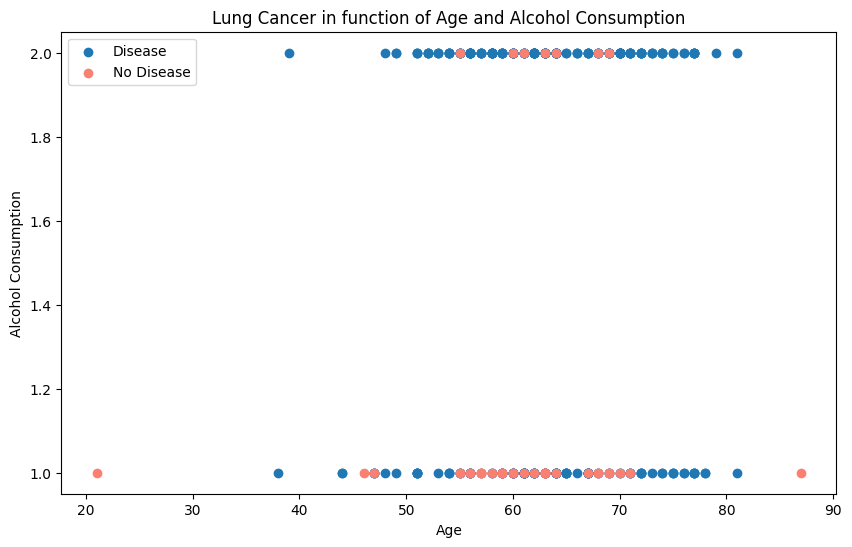

In [ ]:
#Scatter plot with positive heart disease
plt.figure(figsize=(10,6))
plt.scatter(df.AGE[df.LUNG_CANCER=="YES"],df.ALCOHOL_CONSUMING[df.LUNG_CANCER=="YES"])

#Scatter plot with negative heart disease
plt.scatter(df.AGE[df.LUNG_CANCER=="NO"],df.ALCOHOL_CONSUMING[df.LUNG_CANCER=="NO"],color="salmon");

plt.title("Lung Cancer in function of Age and Alcohol Consumption")
plt.xlabel("Age")
plt.ylabel("Alcohol Consumption")
plt.legend(["Disease","No Disease"])

In [13]:
df.corr()

C:\Users\ANSH\AppData\Local\Temp\ipykernel_11244\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC_DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL_CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


C:\Users\ANSH\AppData\Local\Temp\ipykernel_11244\1583423242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


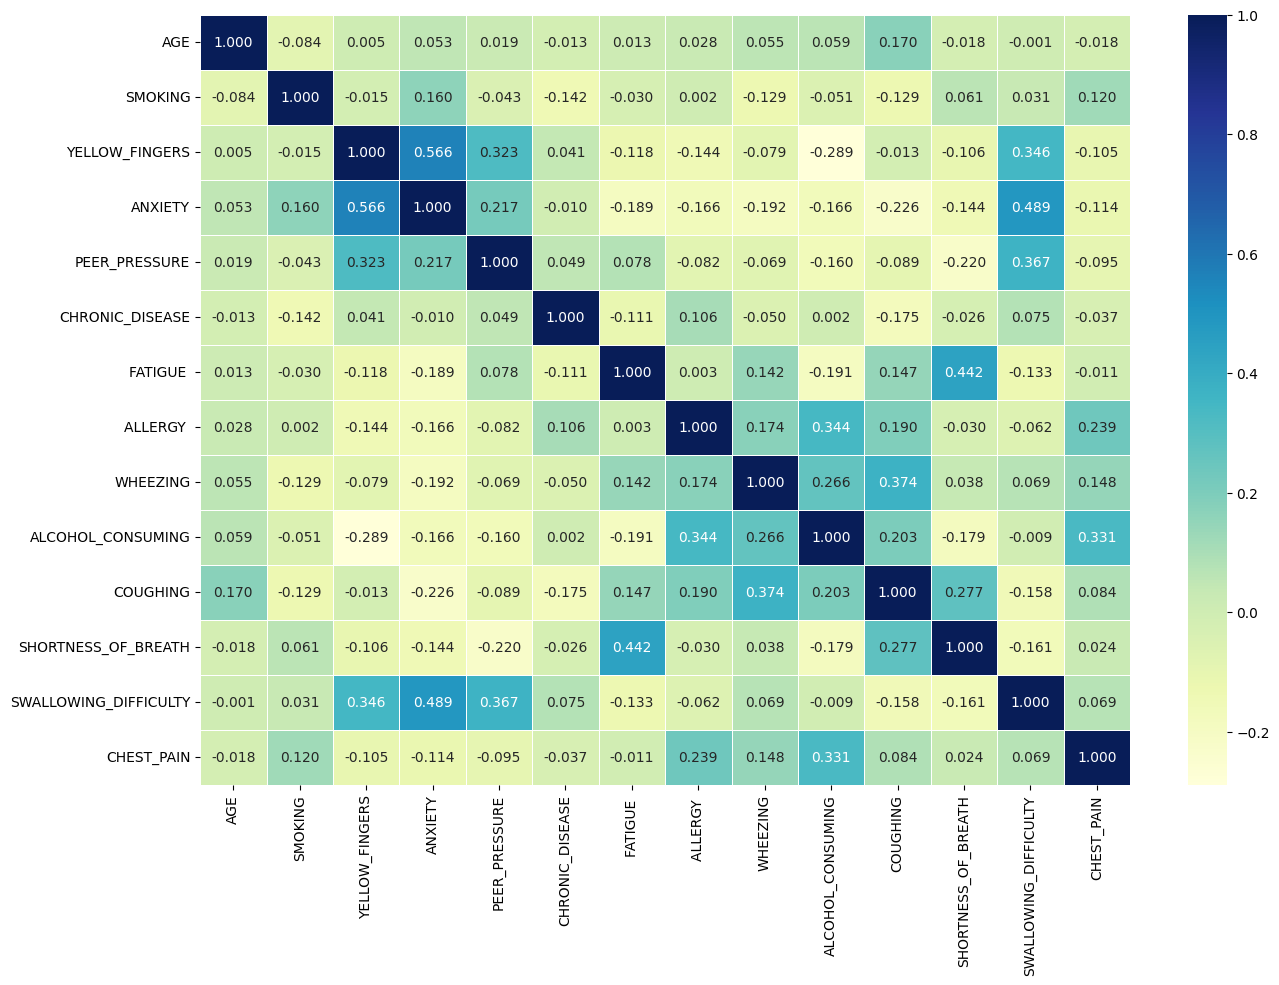

In [14]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".3f",cmap="YlGnBu")

In [15]:
pd.crosstab(df["ANXIETY"],df["YELLOW_FINGERS"])

YELLOW_FINGERS,1,2
ANXIETY,,
1,110,45
2,23,131


In [17]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dummy=pd.get_dummies(df["GENDER"])
dummy

,F,M
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
304,1,0
305,0,1
306,0,1
307,0,1


In [24]:
df.drop("GENDER",axis=1,inplace=True)
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [42]:
df["Female"]=dummy["F"]
df["MALE"]=dummy["M"]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Female,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1,0


In [58]:
df["LUNG_CANCER"]=df["LUNG_CANCER"].replace(['YES','NO'],[1,0])
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Female,MALE,age,target
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1,1,p
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1,1,p
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0,1,p
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1,1,p
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0,1,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,1,0,1,p
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0,1,1,p
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,0,1,1,p
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,0,1,1,p


In [66]:
#importing modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [68]:
x=df.drop("LUNG_CANCER",axis=1)
y=df.LUNG_CANCER

In [70]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [71]:
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,Female,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0,1


In [72]:
np.random.seed(42)
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [73]:
x_train.count()

AGE                      247
SMOKING                  247
YELLOW_FINGERS           247
ANXIETY                  247
PEER_PRESSURE            247
CHRONIC_DISEASE          247
FATIGUE                  247
ALLERGY                  247
WHEEZING                 247
ALCOHOL_CONSUMING        247
COUGHING                 247
SHORTNESS_OF_BREATH      247
SWALLOWING_DIFFICULTY    247
CHEST_PAIN               247
Female                   247
MALE                     247
dtype: int64

In [74]:
x_test.count()

AGE                      62
SMOKING                  62
YELLOW_FINGERS           62
ANXIETY                  62
PEER_PRESSURE            62
CHRONIC_DISEASE          62
FATIGUE                  62
ALLERGY                  62
WHEEZING                 62
ALCOHOL_CONSUMING        62
COUGHING                 62
SHORTNESS_OF_BREATH      62
SWALLOWING_DIFFICULTY    62
CHEST_PAIN               62
Female                   62
MALE                     62
dtype: int64

In [78]:
#Putting models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "Linear SVC": svm.SVC(kernel='linear'),
       "Random Forest": RandomForestClassifier()}
#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={} #Make a dict to keep model scores
    for name,model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

<IPython.core.display.Javascript object>

In [79]:
model_score=fit_and_score(models=models,x_train=x_train,
                         x_test=x_test,y_train=y_train,y_test=y_test)
model_score

C:\Users\ANSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.967741935483871,
 'Linear SVC': 0.967741935483871,
 'Random Forest': 0.967741935483871}

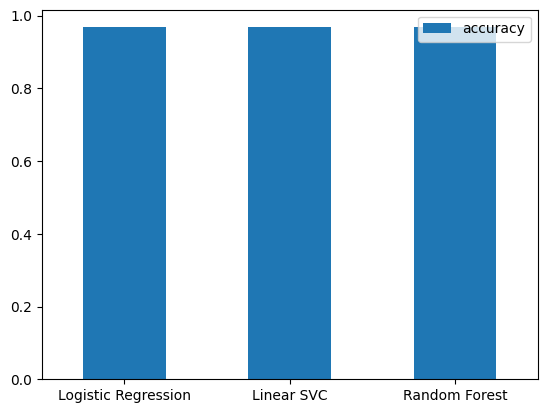

In [ ]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)

In [81]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.967741935483871

In [82]:
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [83]:
confusion_matrix(y_test,y_preds)

array([[ 1,  1],
       [ 1, 59]], dtype=int64)

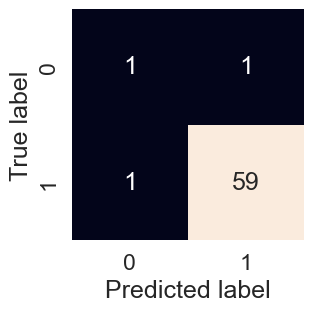

In [88]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [89]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

